In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
samples=pd.read_csv('VF//list.csv',header=None)
samples

,0
0,Dor
1,N604H
2,N604O
3,N595
4,N346
5,CarC
6,HX
7,OrionLH
8,OrionSH
9,HV


In [3]:
Names = ['30 Dor', 'N604', 'N604', 'N595', 'N346', 'Carina', 'H X', 'Orion Large', 'Orion Small', 'H V', 'Lagoon']

In [4]:
Results = {}

for i in range(len(samples)):
    pickle_in = open('VF//' + samples[0][i] + '.pkl',"rb")
    df = pickle.load(pickle_in)
    Results[samples[0][i]] = df
    
Results

{'Dor':              X  Y          RV
 0            0  0  271.013497
 1            1  0  273.394009
 2            2  0  276.240517
 3            3  0  273.005903
 4            4  0  272.423073
 ...        ... ..         ...
 363046  363046  0  258.363412
 363047  363047  0  258.422445
 363048  363048  0  259.203970
 363049  363049  0  258.594459
 363050  363050  0  260.029059
 
 [363051 rows x 3 columns],
 'N604H':          X    Y        RV         I        Sig    SigDisp
 13007   50  207 -3.278625  1.561478  19.433601   9.217834
 13235   51  179  0.337280  1.458737  18.646513   7.415932
 13243   51  187  1.029205  2.026066  15.561231        NaN
 13266   51  210 -3.412536  1.701122  20.380272  11.075156
 13492   52  180 -3.390228  1.675468  18.615374   7.337284
 ...    ...  ...       ...       ...        ...        ...
 52319  204   95 -2.586700  1.866809  17.264912   2.319650
 52825  206   89  1.922028  1.676034  19.880148  10.125408
 52826  206   90  2.390747  1.709574  18.639637   7

In [5]:
for i in range(len(samples)):
    RVhist = Results[samples[0][i]].RV - Results[samples[0][i]].RV.mean()
    Results[samples[0][i]]['RVhist'] = RVhist

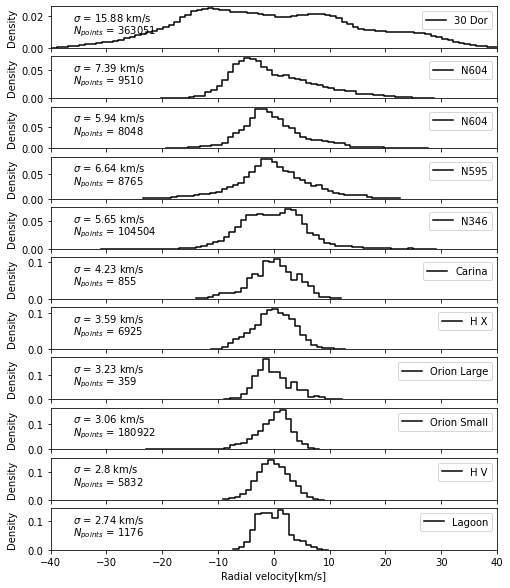

In [10]:
fig, axes = plt.subplots(len(samples), 1, figsize=(8, 10), sharex=True)
#fig.suptitle('PDFs')

for i in range(len(samples)):
    sns.histplot(ax=axes[i],data=Results[samples[0][i]],
                 x="RVhist", binwidth=1, element="step", fill=False, label=str(Names[i]),  color='k', stat='density')
    axes[i].text(.05, .65,'$\sigma$ = ' + str(np.round(Results[samples[0][i]].RV.std(),2))+ ' km/s',  color='k', transform=axes[i].transAxes)
    axes[i].text(.05, .35,'$N_{points}$ = '+ str(Results[samples[0][i]].RV.count()),  color='k', transform=axes[i].transAxes)
    axes[i].legend()

fig.align_labels()    
plt.xlim(-40,40)
plt.xlabel('Radial velocity[km/s]')

#plt.savefig('Imgs//Hist.pdf', bbox_inches='tight')
